# 1. Import libraries

In [1]:
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches

# 2. Import data

In [2]:
music_df = pd.read_csv('music_project_cleaned.csv')

In [3]:
print(music_df.head())

    user_id                        track            artist  genre  \
0  FFB692EC            Kamigata To Boots  The Mass Missile   rock   
1  55204538  Delayed Because of Accident  Andreas Rönnberg   rock   
2    20EC38            Funiculì funiculà       Mario Lanza    pop   
3  A3DD03C9        Dragons in the Sunset        Fire + Ice   folk   
4  E2DC1FAE                  Soul People        Space Echo  dance   

          city                 time        day  
0  Shelbyville  1900-01-01 20:28:33  Wednesday  
1  Springfield  1900-01-01 14:07:09     Friday  
2  Shelbyville  1900-01-01 20:58:07  Wednesday  
3  Shelbyville  1900-01-01 08:37:09     Monday  
4  Springfield  1900-01-01 08:34:34     Monday  


# 3. Initial plotting

In [15]:
#Define color for plots
color_blue = '#0072B2'
color_orange = '#E69F00'

## 3.1 Genres by city

In [16]:
#Filter genres by city
genres_by_city = (music_df.groupby(['city','genre'])['user_id']
                  .nunique()
                  .reset_index(name='num_users')
                  .sort_values(by='num_users',ascending=False))

#Get top 10 genres for each city
genres_sprg = (genres_by_city[genres_by_city['city']=='Springfield']
               .sort_values(by='num_users', ascending=False)
               .head(10))
genres_shlb = (genres_by_city[genres_by_city['city']=='Shelbyville']
               .sort_values(by='num_users', ascending=False)
               .head(10))

#Print top 3
print(f'Top 3 genres in Springfield: {", ".join(genres_sprg["genre"].head(3))}')
print(f'Top 3 genres in Shelbyville: {", ".join(genres_shlb["genre"].head(3))}')

Top 3 genres in Springfield: pop, dance, rock
Top 3 genres in Shelbyville: pop, rock, dance


Both Springfield and Shelbyville share the same three dominant music genres—pop, dance, and rock. The order of preference varies by city, but the overall pattern suggests similar musical tastes across the two populations.

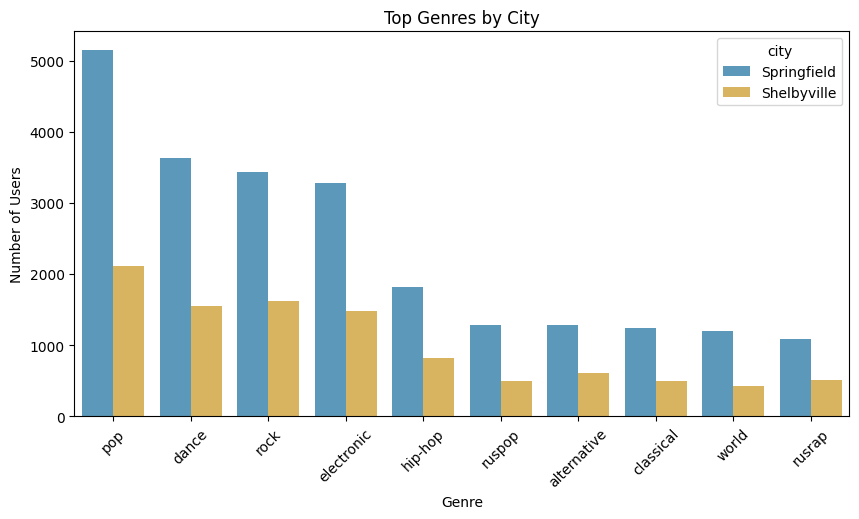

In [17]:
#Combine both dataframes
genres_by_city = (pd.merge(genres_sprg, genres_shlb, how='outer') 
                  #outer join to keep all genres
                  .sort_values(by='num_users', ascending=False)
                  .reset_index(drop=True))

#Plot the top genres by city
plt.figure(figsize=(10,5)) #Define plot size
sns.barplot(data=genres_by_city, x='genre', y='num_users', hue='city', 
            palette={'Springfield': color_blue, 'Shelbyville': color_orange},
            alpha=0.7
            ) #Create bar plot
#Customize the plot
plt.title('Top Genres by City')
plt.xlabel('Genre')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show() #Display the plot

## 3.2 Musics by day

In [18]:
print(music_df.head())

    user_id                        track            artist  genre  \
0  FFB692EC            Kamigata To Boots  The Mass Missile   rock   
1  55204538  Delayed Because of Accident  Andreas Rönnberg   rock   
2    20EC38            Funiculì funiculà       Mario Lanza    pop   
3  A3DD03C9        Dragons in the Sunset        Fire + Ice   folk   
4  E2DC1FAE                  Soul People        Space Echo  dance   

          city                time        day  hour  
0  Shelbyville 1900-01-01 20:28:33  Wednesday    20  
1  Springfield 1900-01-01 14:07:09     Friday    14  
2  Shelbyville 1900-01-01 20:58:07  Wednesday    20  
3  Shelbyville 1900-01-01 08:37:09     Monday     8  
4  Springfield 1900-01-01 08:34:34     Monday     8  


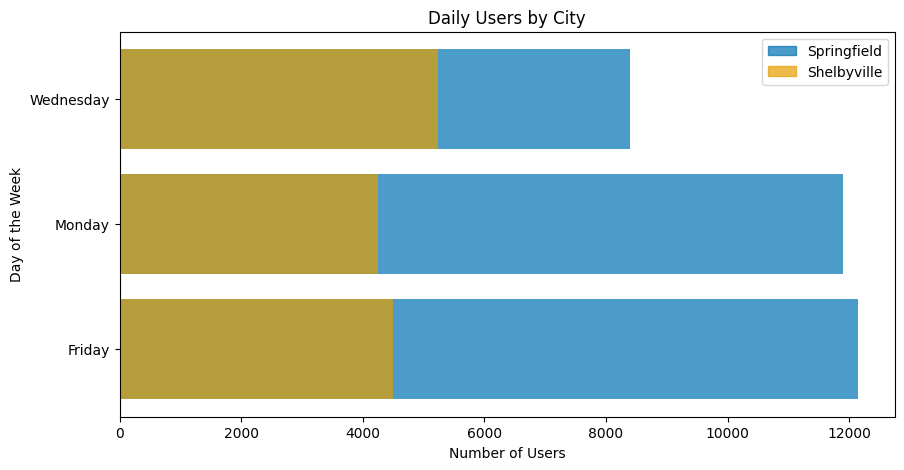

In [19]:
#Filter users by day
music_daily = (music_df.groupby(['city','day'])['user_id']
               .nunique()
               .reset_index(name='daily_users')
               .sort_values(by='daily_users', ascending=False))
#print(music_daily.head())

#Plot daily users by city
plt.figure(figsize=(10,5))
plt.barh(y=music_daily['day'],
        width=music_daily['daily_users'],
        color=([color_blue if city == 'Springfield' 
                else color_orange for city in music_daily['city']]),
        #Color must be a list in matplotlib
        alpha=0.7
        )

# Create patches for legend
spring_patch = mpatches.Patch(color=color_blue, label='Springfield', alpha=0.7)
shelby_patch = mpatches.Patch(color=color_orange, label='Shelbyville', alpha=0.7)
plt.legend(handles=[spring_patch, shelby_patch])

#Plot customization
plt.title('Daily Users by City')
plt.xlabel('Number of Users')
plt.ylabel('Day of the Week')
plt.show()

In [20]:
# Function to get top 3 days per city
def top_days_per_city(df, city):
    #Filter data for the specified city
    city_data = df[df['city'] == city]
    #Group by day and count unique users
    top_days = (city_data.groupby('day')['user_id']
                .nunique()
                .reset_index(name='num_users')
                .sort_values(by='num_users', ascending=False)
                .head(3))
    return top_days

#Get top days for each city
top_days_sprg = top_days_per_city(music_df, 'Springfield')
top_days_shlb = top_days_per_city(music_df, 'Shelbyville') 
print(f'Top 3 days in Springfield: {", ".join(top_days_sprg["day"])}')
print(f'Top 3 days in Shelbyville: {", ".join(top_days_shlb["day"])}')

Top 3 days in Springfield: Friday, Monday, Wednesday
Top 3 days in Shelbyville: Wednesday, Friday, Monday


Music‑listening behavior varies significantly between the two cities. Springfield users show a clear peak on Fridays, whereas Shelbyville users reach their highest activity on Wednesdays, indicating distinct weekly engagement patterns.

Shelbyville has fewer users than Springfield, so conclusions based solely on absolute user counts can be misleading. To make a fair comparison between the two cities, it is important to:
* Compare the total number of inhabitants in each city across the years
* Perform a relative analysis by normalizing user activity according to population size

## 3.3 Musics by time of the day

In [21]:
#Create hour column
music_df['time'] = pd.to_datetime(music_df['time'], errors='coerce')
music_df['hour'] = music_df['time'].dt.hour
print(music_df.head())

    user_id                        track            artist  genre  \
0  FFB692EC            Kamigata To Boots  The Mass Missile   rock   
1  55204538  Delayed Because of Accident  Andreas Rönnberg   rock   
2    20EC38            Funiculì funiculà       Mario Lanza    pop   
3  A3DD03C9        Dragons in the Sunset        Fire + Ice   folk   
4  E2DC1FAE                  Soul People        Space Echo  dance   

          city                time        day  hour  
0  Shelbyville 1900-01-01 20:28:33  Wednesday    20  
1  Springfield 1900-01-01 14:07:09     Friday    14  
2  Shelbyville 1900-01-01 20:58:07  Wednesday    20  
3  Shelbyville 1900-01-01 08:37:09     Monday     8  
4  Springfield 1900-01-01 08:34:34     Monday     8  


In [22]:
# Function to get top 3 hours per city
def top_hours_per_city(df, city):
    #Filter data for the specified city
    city_data = df[df['city'] == city]
    #Group by hour and count unique users
    top_hours = (city_data.groupby('hour')['user_id']
                .nunique()
                .reset_index(name='num_users')
                .sort_values(by='num_users', ascending=False)
                .head(3))
    return top_hours

#Get top hours for each city
top_hours_sprg = top_hours_per_city(music_df, 'Springfield')
top_hours_shlb = top_hours_per_city(music_df, 'Shelbyville') 
print(f'Top 3 hours in Springfield: {", ".join(top_hours_sprg["hour"].astype(str))}')
print(f'Top 3 hours in Shelbyville: {", ".join(top_hours_shlb["hour"].astype(str))}')

Top 3 hours in Springfield: 20, 14, 13
Top 3 hours in Shelbyville: 14, 20, 13


Hours 20, 14, and 13 are the peak listening times in both Springfield and Shelbyville. The order of importance differs between the two cities, but these three hours consistently represent the highest activity levels overall.

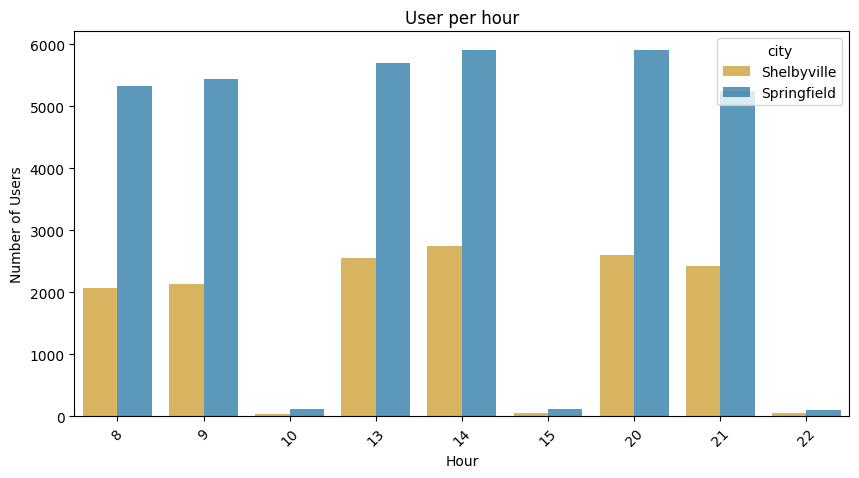

In [23]:
#Filter dataframe
music_per_hour = (music_df
                  .groupby(['city','hour'])['user_id']
                  .nunique()
                  .reset_index(name='num_users')
                  )

#Plot the top hoursby city
plt.figure(figsize=(10,5)) #Define plot size
sns.barplot(data=music_per_hour,
            x='hour',
            y='num_users', hue='city',
            alpha=0.7,
            palette={'Springfield': color_blue, 'Shelbyville': color_orange})
#Customize the plot
plt.title('User per hour')
plt.xlabel('Hour')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show() #Display the plot

## 3.4 Musics by city

In [37]:
musics_sprg = (music_df[music_df['city']=='Springfield']['user_id']
               .count())
musics_shlb = (music_df[music_df['city']=='Shelbyville']['user_id']
               .count())
#print(music_df.head())
print(f'Musics listened by city\n\tSpringfield: {musics_sprg}\n\tShelbyville: {musics_shlb}')
print(f'Musics ratio Springfield/Shelbyville: {musics_sprg/musics_shlb:.1f}')

Musics listened by city
	Springfield: 42741
	Shelbyville: 18512
Musics ratio Springfield/Shelbyville: 2.3


Springfield’s music‑listening activity is more than twice as high as Shelbyville’s. Several factors could explain this difference, such as:

* Population size — Springfield may simply have more potential listeners.
* Alternative platforms — Shelbyville users might rely more heavily on other music apps or offline listening methods.

However, the current dataset does not provide enough information to determine the exact cause, so any explanation remains speculative.

# 4. Main conclusions

* Genre preferences:

Both Springfield and Shelbyville share the same three dominant music genres—pop, dance, and rock. The order of preference varies by city, but the overall pattern suggests similar musical tastes across the two populations.

* Day preferences:

Music‑listening behavior varies significantly between the two cities. Springfield users show a clear peak on Fridays, whereas Shelbyville users reach their highest activity on Wednesdays, indicating distinct weekly engagement patterns.

* Hour preferences:

Hours 20, 14, and 13 are the peak listening times in both Springfield and Shelbyville. The order of importance differs between the two cities, but these three hours consistently represent the highest activity levels overall.

* Listeners' number:

Springfield’s music‑listening activity is more than twice as high as Shelbyville’s. However, the current dataset does not provide enough information to determine the exact cause, so any explanation remains speculative (population size, alternative platforms, etc).


* Insights: 

Marketing pricing strategies may need to be adjusted for each city, taking into account the specific peak days and hours of user activity.

Ads placed within the top preferred genres (pop, dance, and rock) are likely to achieve higher engagement, given their strong and consistent popularity across both cities.


